## Mani Kanta Yaswanth Jalagadugu 





# U48993625

# Initial setup

Let's import a number of libraries that we expect to use

In [15]:
# if running on colab, you may need to uncomment the following lines
# if you get an error saying that the module is not found
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install ipympl

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1) # set this to ensure the results are repeatable. 

sample_size = 1000

### Let's define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [17]:
# we will define a linear model with the following parameter values (arguements)
b2 = 1.5 # slope for x^2
b1 = 3.5 # slope for x
b0 = 1 # intercept

In [18]:
# we will generate the x data using a normal distribution
x_mean = 0
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

# we will generate the y data using our 'hidden function' and the x data
y = b0 + b1 * X + b2 * X**2 
#y = b0 * X**0 + b1 * X**1 + b2 * X**2 # NOTE: It's more useful to think of a polynomial like this... it's the same as the one above, but says more

# we will add some noise to the y data
e_mean = 0
e_stdev = 100
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2)
y = y + e

Let's plot this sample data using a scatter plot

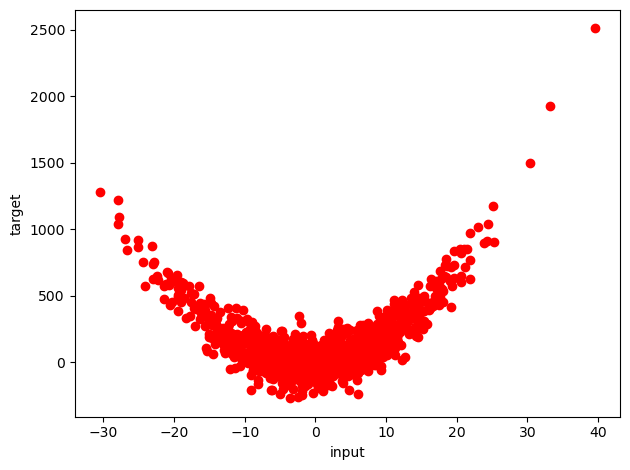

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [20]:
df = pd.DataFrame({'X': X, 'y': y})
df.head(3)

,X,y
0,16.24,438.1264
1,-6.12,-207.4884
2,-5.28,75.1376


In [21]:
df.to_csv('c02_dataset_4.csv', index=False)

In [22]:
# if running on colab, you may need to uncomment the following lines
# if you get an error saying that the module is not found
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install ipympl

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

In [24]:
df = pd.read_csv('c02_dataset_4.csv')

df.head(10)

,X,y
0,16.24,438.12640
1,-6.12,-207.48840
2,-5.28,75.13760
3,-10.73,103.74435
4,8.65,-7.60125
5,-23.02,628.17060
6,17.45,432.34875
7,-7.61,122.10315
8,3.19,83.58915
9,-2.49,153.06515


In [25]:
X = df[['X']]
y = df[['y']]

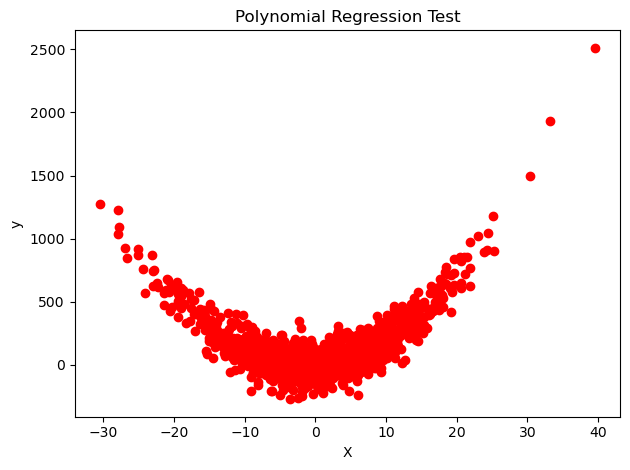

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [27]:
lin_reg1=LinearRegression().fit(X,y)

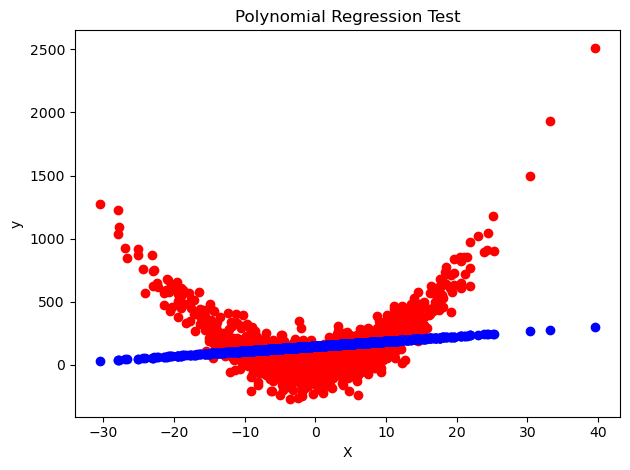

In [28]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [29]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [30]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 148.1619469528557 + 3.889315352288553x
R^2: 0.023893162383578526


In [31]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}") 
# for more on fstrings see here https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 148.16 + 3.89x
R^2: 0.024


In [32]:
# random_state is set to a defined value to get the same partitions when re-running the code
train_data= df.sample(frac=0.7, random_state=1)
# assign rows that are not already in the training set, into validation 
valid_data = df.drop(train_data.index)

print('Training   : ', train_data.shape)
print('Validation : ', valid_data.shape)
print()



Training   :  (700, 2)
Validation :  (300, 2)



In [33]:
model = LinearRegression()

In [34]:
X_train = train_data[['X']].copy()
y_train = train_data[['y']].copy()

X_valid = valid_data[['X']].copy()
y_valid = valid_data[['y']].copy()

X_poly_train=PolynomialFeatures(degree=2).fit_transform(X_train)
X_poly_valid=PolynomialFeatures(degree=2).fit_transform(X_valid)


In [35]:
lin_reg2=model.fit(X_poly_train,y_train)
# Step 3: Use the model to predict the target values
y_valid[['predicted']] = lin_reg2.predict(X_poly_valid)
y_valid.head()


,y,predicted
7,122.10315,59.036674
10,437.57660,382.310204
15,120.23000,142.809232
20,108.57515,143.108442
21,185.58875,243.638076


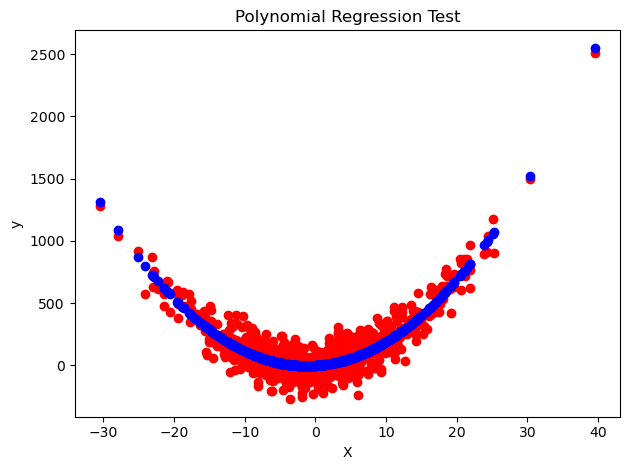

In [36]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_train, y_train, color='red')
ax.scatter(X_train,lin_reg2.predict(X_poly_train),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [37]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly_train, y_train):.2f}")



Y = -0.76 + 3.80x + 1.53x^2
R^2: 0.83


# Summary 



The Above plot is in Curve shape. To analyze the graph we used polynomial regression test,we used diffrent lines(straight and curved) to analyze and compare the data to make better predictions.Out of both the curved line in linear regression test perfectly fits the model.